In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt

#### Function to generate the L-system string from axiom and rules

In [23]:
def generate_lsystem(axiom: str, rules: dict, num_iter: int):
    current_string = axiom
    for _ in range(num_iter):
        # Expand the non terminal symbols into terminals and non terminals
        next_string = "".join(rules.get(char, char) for char in current_string)
        current_string = next_string
    return current_string

#### Function to visualize L-system string

In [24]:
def draw_lsystem(lsystem_string: str, angle: int, num_iter: int):
    x, y, current_angle = 0.0, 0.0, angle
    x_coords, y_coords = [x], [y]
    stack = list()
    for char in lsystem_string:
        # Move forward by a fixed distance in the current direction
        if char == 'F':
            angle_rad = math.radians(current_angle)
            x += math.cos(angle_rad)
            y += math.sin(angle_rad)
            x_coords.append(x)
            y_coords.append(y)
        # Turn clockwise by the given angle
        elif char == '+':
            current_angle = (current_angle - angle) % 360
        # Turn counter-clockwise by the given angle
        elif char == '-':
            current_angle = (current_angle + angle) % 360
        # Save the current position onto stack beginning a branch
        elif char == '[':
            stack.append((x, y, current_angle))
        # Restore the last saved position from stack completing a branch
        elif char == ']':
            x, y, current_angle = stack.pop()
            x_coords.append(np.nan)
            y_coords.append(np.nan)
            x_coords.append(x) 
            y_coords.append(y)
    _, ax = plt.subplots(figsize=(8, 8))
    ax.plot(x_coords, y_coords, color='blue', linewidth=1.0)
    ax.set_aspect('equal', adjustable='box') 
    ax.axis('off')
    plt.title(f"L-System (iterations: {num_iter}, angle: {angle})")
    plt.show()

#### Visualizing the L-systems defined by axiom, rule and angle

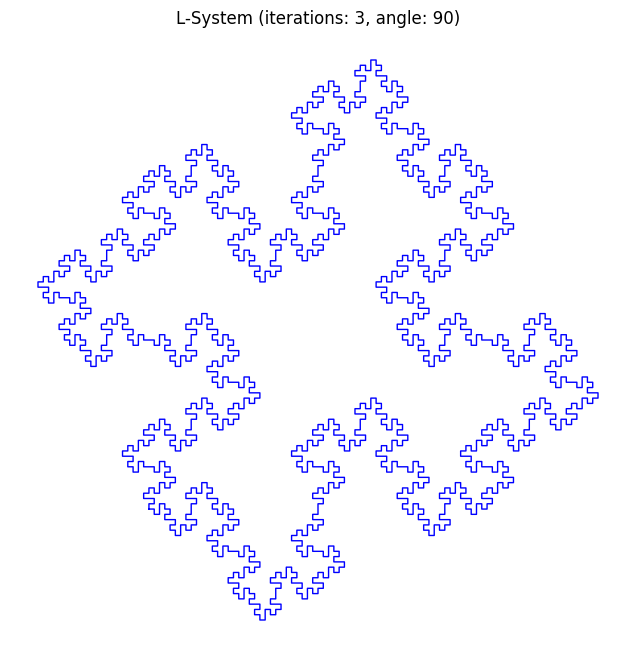

In [25]:
axiom = "F+F+F+F"
rules = {"F": "F+F-F-FF+F+F-F"}
angle = 90
num_iter = 3
lsystem_string = generate_lsystem(axiom, rules, num_iter)
draw_lsystem(lsystem_string, angle, num_iter)

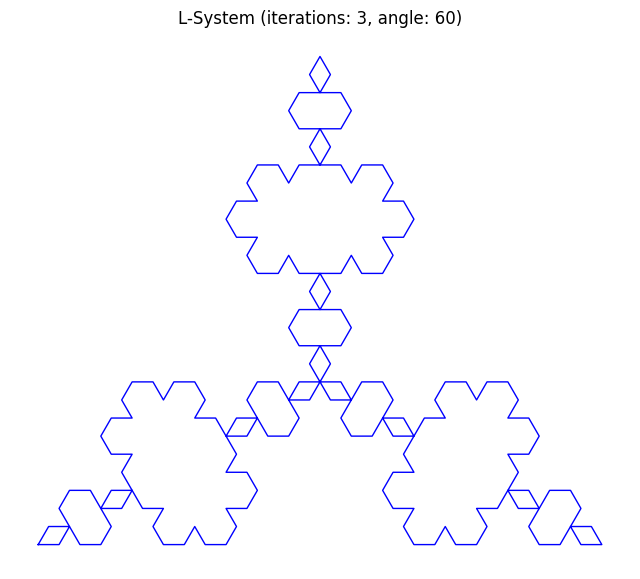

In [26]:
axiom = "F++F++F"
rules = {"F": "F+F--F+F"}
angle = 60
num_iter = 3
lsystem_string = generate_lsystem(axiom, rules, num_iter)
draw_lsystem(lsystem_string, angle, num_iter)

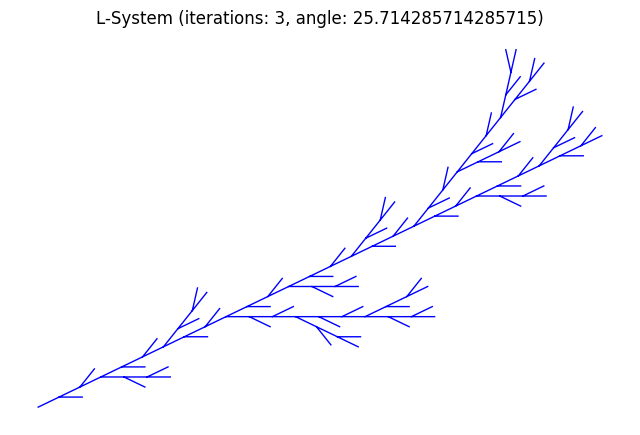

In [27]:
axiom = "F"
rules = {"F": "F[+F]F[-F]F"}
angle = math.degrees(math.pi / 7) 
num_iter = 3
lsystem_string = generate_lsystem(axiom, rules, num_iter)
draw_lsystem(lsystem_string, angle, num_iter)

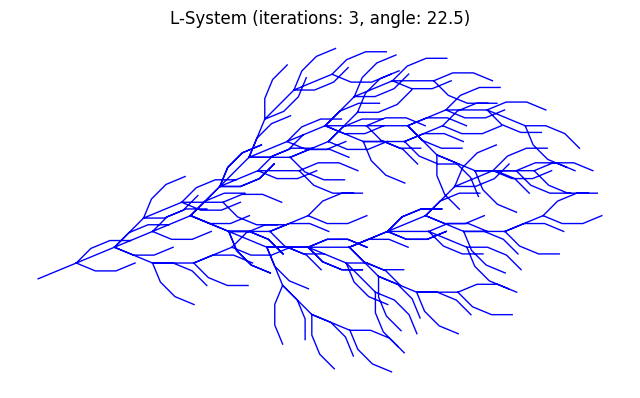

In [28]:
axiom = "F"
rules = {"F": "FF+[+F-F-F]-[-F+F+F]"}
angle = math.degrees(math.pi / 8) 
num_iter = 3
lsystem_string = generate_lsystem(axiom, rules, num_iter)
draw_lsystem(lsystem_string, angle, num_iter)